Importei as duas bibliotecas Pandas e Numpy


In [ ]:
import pandas as pd
import numpy as np

https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv

https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv

Importando os arquivos csv referentes aos meses de JUNHO e JULHO (links acima) para depois juntá-los num único dataframe:

In [ ]:
junho = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv', sep=';')
junho.head()

In [ ]:
julho = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv', sep=';')
julho.head()

Juntando os Dataframes de junho e julho

In [ ]:
df = pd.merge(junho, julho, how='outer')
df.head()

Limpando o DataFrame (remoção das informações não úteis à Análise):

Checando se todos os valores de compra são nulos. Caso sejam, pode ser removido:

In [ ]:
print(df['Valor de Compra'].unique())

[nan]


Checando se só há uma unidade de medida (R$/litro)

In [ ]:
print(df['Unidade de Medida'].unique())

['R$ / litro']


In [ ]:
df.drop(['CNPJ da Revenda', 'Nome da Rua', 'Número Rua','Complemento','Cep','Valor de Compra','Unidade de Medida','Município','Revenda','Bairro','Data da Coleta','Bandeira','Estado - Sigla'], axis=1, inplace=True)

In [ ]:
df.head()

,Região - Sigla,Produto,Valor de Venda
0,N,GASOLINA,"6,89"
1,N,GASOLINA ADITIVADA,"6,89"
2,N,ETANOL,"6,1"
3,N,GASOLINA,"6,89"
4,N,GASOLINA,"6,89"


Para cálculos numéricos, preciso que o valor de venda esteja como numérico. Se tiver como string, o cálculo não será feito. Checando seValor de Venda é numérico ou não.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97586 entries, 0 to 97585
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Região - Sigla  97586 non-null  object
 1   Estado - Sigla  97586 non-null  object
 2   Município       97586 non-null  object
 3   Revenda         97586 non-null  object
 4   Bairro          97327 non-null  object
 5   Produto         97586 non-null  object
 6   Data da Coleta  97586 non-null  object
 7   Valor de Venda  97586 non-null  object
 8   Bandeira        97586 non-null  object
dtypes: object(9)
memory usage: 7.4+ MB


O valor de venda é uma string (object). Abaixo a vírgula será substituída por ponto e depois o valor será convertido de objeto para numérico de forma a preparar o campo para o cálculo.

In [ ]:
df['Valor de Venda'] = df['Valor de Venda'].replace(',', '.', regex=True).astype(float)
df.head()

,Região - Sigla,Produto,Valor de Venda
0,N,GASOLINA,6.89
1,N,GASOLINA ADITIVADA,6.89
2,N,ETANOL,6.10
3,N,GASOLINA,6.89
4,N,GASOLINA,6.89


Checando se converteu para float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97586 entries, 0 to 97585
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Região - Sigla  97586 non-null  object 
 1   Produto         97586 non-null  object 
 2   Valor de Venda  97586 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.0+ MB


Importei a biblioteca Matplotlib para poder plotar os gráficos para exibir meu resultados.

In [ ]:
import matplotlib.pyplot as plt

# Qual região que possui o maior valor médio da gasolina ?

Isolamos apenas os dados necessários e descobrimos a média do Valor de Venda do combustível GASOLINA para todas as regiões.

In [ ]:
mediagasolina = df.loc[df['Produto'] == 'GASOLINA'].groupby('Região - Sigla').mean().round(2)
mediagasolina.head()

,Valor de Venda
Região - Sigla,
CO,5.90
N,5.82
NE,5.86
S,5.71
SE,5.66


Plotagem do Gráfico

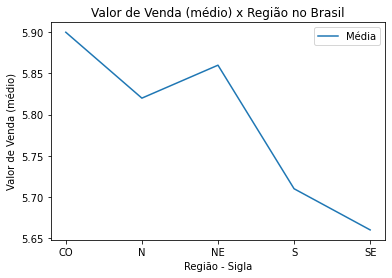

In [ ]:
plt.plot(mediagasolina,label = 'Média')
plt.title('Valor de Venda (médio) x Região no Brasil')
plt.xlabel('Região - Sigla')
plt.ylabel('Valor de Venda (médio)')
plt.legend()
plt.show()

Após uma breve análise, deduz-se que a região com o maior valor médio é a **CO (Centro Oeste).**

# Qual a região que possui o menor valor médio do etanol?

Utilizamos o mesmo método para descobrir a pergunta anterior

In [ ]:
mediaetanol = df.loc[df['Produto'] == 'ETANOL'].groupby('Região - Sigla').mean().round(2)
mediaetanol.head()

,Valor de Venda
Região - Sigla,
CO,4.41
N,5.05
NE,5.09
S,4.82
SE,4.35


Plotagem do gráfico

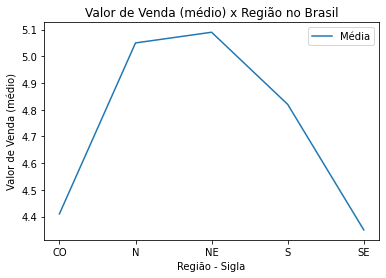

In [ ]:
plt.plot(mediaetanol,label = 'Média')
plt.title('Valor de Venda (médio) x Região no Brasil')
plt.xlabel('Região - Sigla')
plt.ylabel('Valor de Venda (médio)')
plt.legend()
plt.show()

Após uma breve análise, deduz-se que a região com o menor valor médio é a **SE (Sudeste)**.